1370


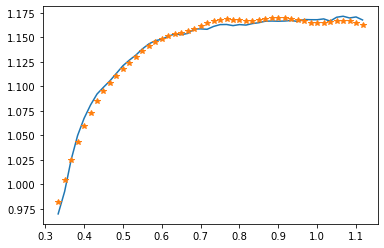

1375


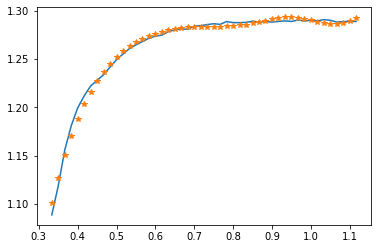

1380


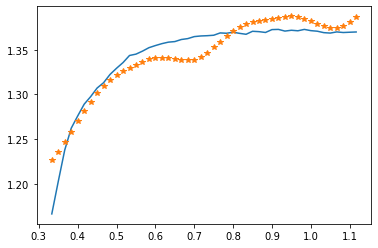

1383


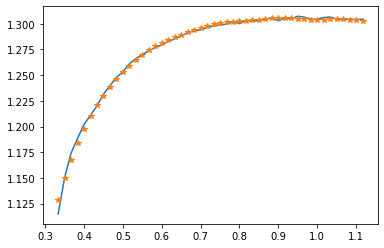

1385


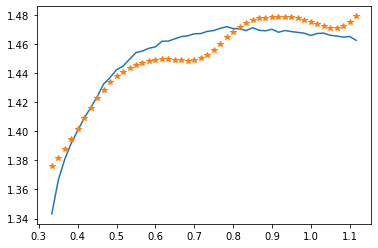

1387


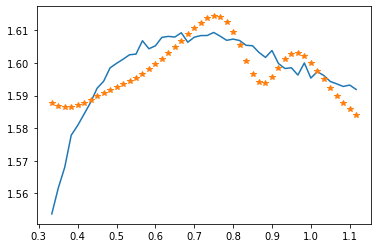

1390


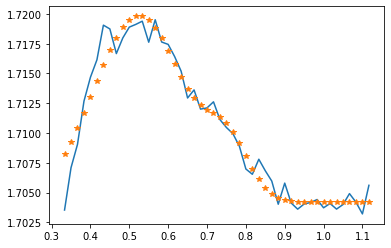

1392


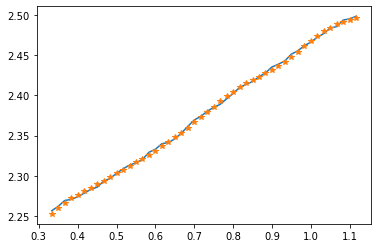

1395


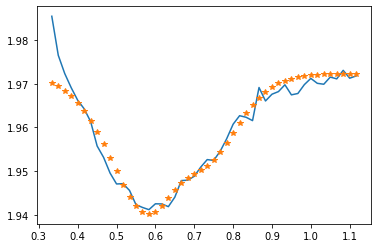

1397


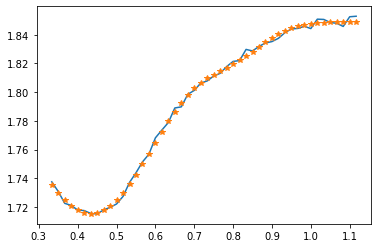

1400


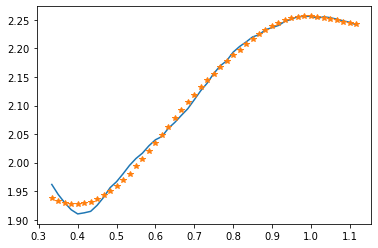

1410


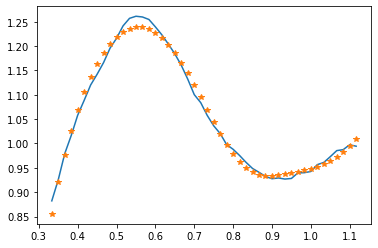

1420


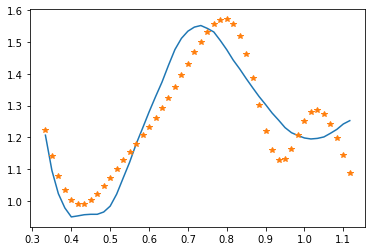

1430


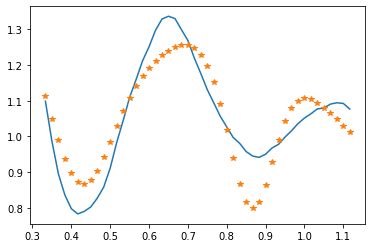

1449


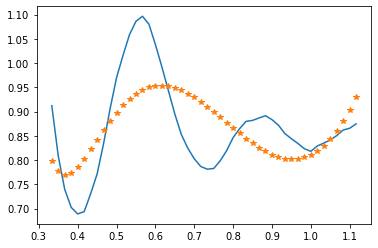

1460


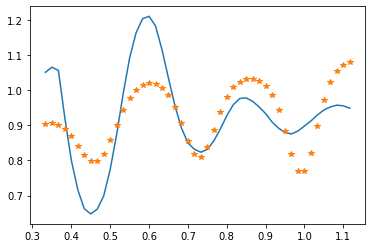

1465


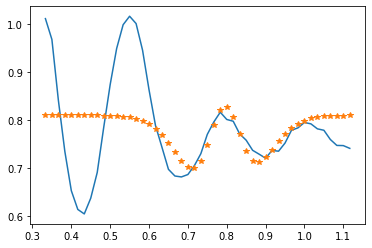

1470


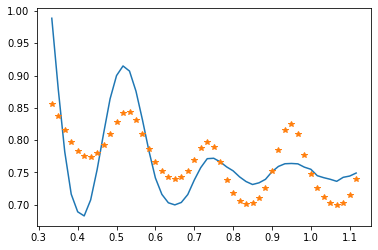

1471


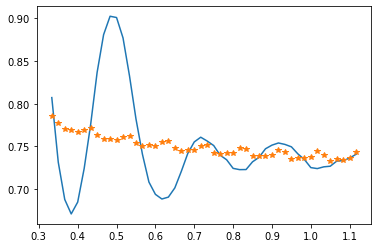

1473


/Users/brian_z/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


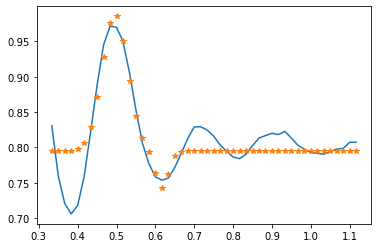

1475


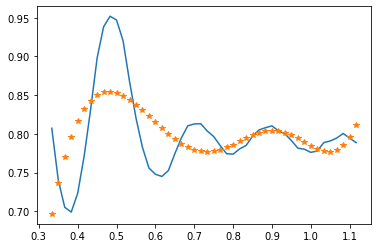

1477


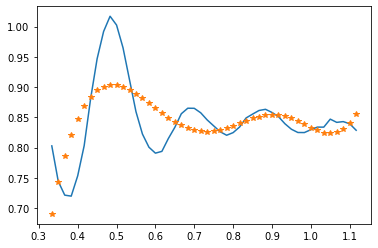

1479


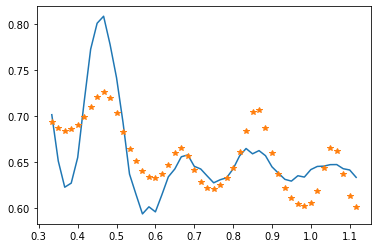

1480


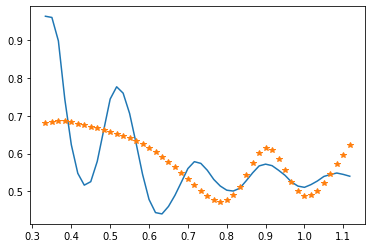

1483


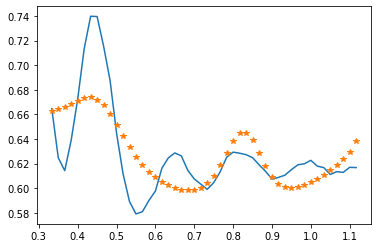

1485


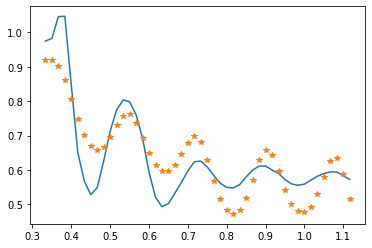

1489


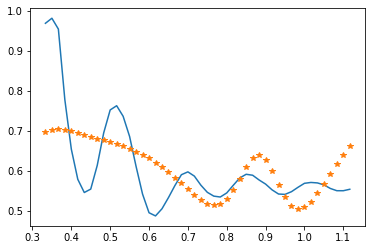

1500


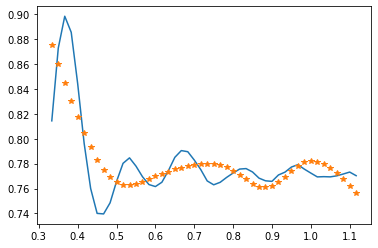

1505


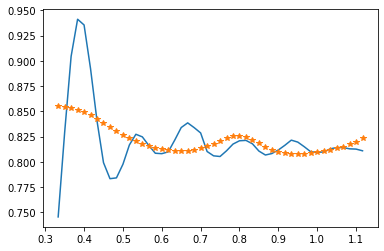

1509.5


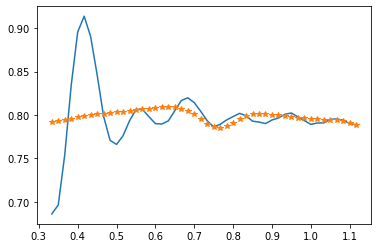

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit

def fit_func(x, A, B, Epsilon_0, L_p, lam_p, x_A, x_B, a):
    return Epsilon_0 + A * (math.e ** (-2 * x / L_p * np.sin(4 * math.pi * (x - x_A) / lam_p))) / (x ** (1/2)) + B * (math.e ** (-x / L_p * np.sin(2 * math.pi * (x - x_B) / lam_p))) / (x ** a)

data = pd.read_csv(r'/Users/brian_z/Desktop/Research/ET_hBN_fitting/S3_mat.csv')
data2 = pd.read_csv(r'/Users/brian_z/Desktop/Research/ET_hBN_fitting/backup/recorded values.csv')
frequencies = data.columns
values = data.values
basis = data2.values
result = []
for i in range(30):
    x_list = np.linspace(1/60,5,300)
    ind_start = basis[0][-2]
    ind_end = basis[0][-1]
    st_ind = basis[0][-4]
    end_ind = basis[0][-3]
    y_list = values[:,i]
    x_list = x_list[ind_start:ind_end]
    x_list = x_list - x_list[0] + 0.25
    y_list = y_list[ind_start:ind_end]
    y_list = y_list[::-1]
    x_list = x_list[st_ind:end_ind]
    y_list = y_list[st_ind:end_ind]
#     popt, pcov = curve_fit(fit_func, x_list, y_list, bounds=([0,0,0,0,0,-np.inf,-np.inf,0],10), maxfev = 50000, p0=[basis[0][0],basis[0][2],basis[0][6],basis[0][4],basis[0][5],basis[0][1],basis[0][3],1], method = "lm")
    popt, pcov = curve_fit(fit_func, x_list, y_list, maxfev = 5000)
    result.append(popt)
    print(frequencies[i])
    plt.plot(x_list, y_list)
    plt.plot(x_list, fit_func(x_list, *popt), "*")
    plt.show()

In [2]:
print(result[-5])

[0.19831954 0.10843652 0.21491839 4.12287674 0.35696334 0.94607813
 1.07909892]
